<h1>Predicting the Premier League table for the 2020/21 season</h1>

<h2>Introduction</h2>
<p>In this notebook, I will make my own predictions on the 2020/21 season using variables that I have personally chosen. We will then use the averages to rank each team.</p> 

<h2>Data collection</h2>
<p>All the data presented here was scraped from the following websites:</p>

<ol>
    <li>
        <a href="https://www.skysports.com/premier-league-table/">Skysports</a>
    </li>
    
    <li>
        <a href="https://www.premierleague.com/clubs/">Premier League official website</a>
    </li>  
    <li>
        <a href="https://www.spotrac.com/epl/">Spotrac</a>
    </li>           
</ol>

The source code for the web scrapers are in the github repository. 
<ul>
    <li>analysis_for_league.py</li>
    <li>analysis_for_team_per_season.py</li>
    <li>current_year_analysis.py</li>  
    <li>get_team_names.py</li>        
</ul> 

<h2>Motivation</h2>
<p>As a huge Manchester united fan, I have been wondering when my team will next lift the premier league title. Its approaching <b>10 years</b> since this has been achieved and altough it seems unlikely this season, it would be nice to see my team make an effort towards that goal. Through this notebook, we will try to quantify how close united are to that goal as well as the finishing positions for the other teams.</p> 

<h2>Variables</h2>


<p>To get our final result, we will use the variables described below. Some teams have not been in the league for 5 consecutive seasons due to promotions and relegations, so we will just take the avergaes of when they have been in the league.</p> 


<h3>Variables analysing seasons 2015/16 - 2019/20 --</h3>
<ol>

<li>
<b>Contribution average:</b>
Level of contribution a given player will add to their squad either by goals, assists or clean sheets. The higher the average is for the last 5 seasons, the better the chemistry of the team.
</li>

<br/>

<li>
<b>Points</b>
The average number of points a team collects over the past 5 seasons. The higher the average is, the more dominant the team is.
</li>

<br/>

<li>
<b>Competition level:</b>
This is the standard deviation of points for each season; for a sense of how difficult the environment was in order for the team to achieve the points they did. The higher the competition level for the past 5 seasons, the easier it is for dominant teams to beat the smaller teams. 
</li>

<br/>

<li>
<b>Squad depth:</b>
A ratio between the starting 11 and the number of options a team has to bring on from the bench. In other words, the ability for a team to rotate to sustain a level of performance throughout a season. The higher this value over the past 5 seasons, the more consistent a team will be in their results.
</li> 

<br/>

<li>
<b>Outstanding players:</b>
This variable builds up on the 'Contribution average' but on an individual level. These players contribute to full time results at least once every two games. The more 'outstanding' players a club has, the more games they are likely to win.    
</li>
  
</ol>

<h3>Variables analysing just season 2019/20 --</h3>
<ol>
<br/>
<li>
<b>Level of commitment:</b>
This is the average time it takes for a players contract to finish at a club. The higher this value, the more willing players are to stay at their clubs.
</li>
<br/>
<li>
<b>Club value:</b>
Relative measurement of how rich the club is compared to other teams in the league; based on the salaries players are recieving. The higher this value, the more likely board members are to reinvest into their squads.  
</li>
</ol>

<h2>Imports</h2>

In [31]:
import pandas as pd 
import matplotlib.pyplot as plt
team_averages = pd.read_csv('./data/team_player_averages.csv')
league_data = pd.read_csv('./data/league_data_each_team.csv')
current_year = pd.read_csv('./data/current_year_analysis.csv')
outstanding = pd.read_csv('./data/out_standing_players.csv')

In [32]:
all_data = team_averages.merge(league_data)
all_data = all_data.merge(current_year)

In [33]:
all_data.head()

,prem_name,contribution_average,squad_depth,points,competition_level,club_value,commitment_level
0,Arsenal,0.328663,0.595645,67.0,18.648483,97606273,74
1,Aston Villa,0.172127,0.597222,26.0,16.606515,17377000,48
2,Brighton and Hove Albion,0.184537,0.585122,39.0,19.317658,24442666,79
3,Burnley,0.250289,0.452546,47.0,19.451000,21632000,40
4,Chelsea,0.311996,0.578707,70.2,18.648483,114940000,115


In [34]:
all_data.columns

Index(['prem_name', 'contribution_average', 'squad_depth ', 'points',
       'competition_level', 'club_value', 'commitment_level'],
      dtype='object')

In [35]:
all_data.rename(columns={'squad_depth ':'squad_depth'}, inplace=True)

<h1>Visuals of the main variables</h1>

In [36]:
def draw_barh_v1 (names, values, type):
    plt.rcParams["figure.figsize"] = (5,5)
    plt.title("Graph showing "+type+" for each team")
    plt.xlabel(type+" score")
    plt.ylabel("2020/21 Premier clubs")
    plt.barh(names, values)    
    plt.show()

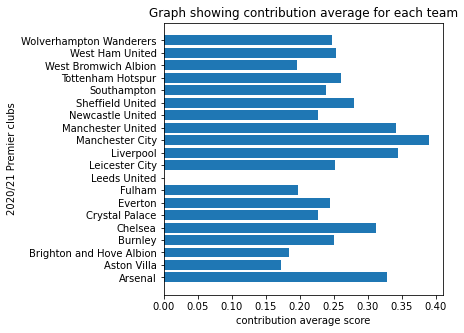

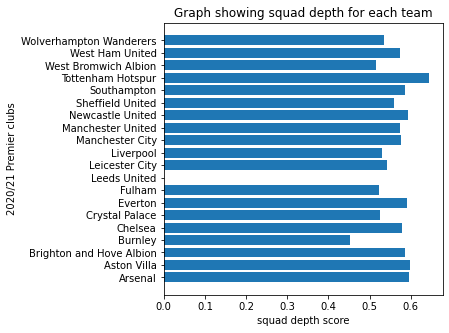

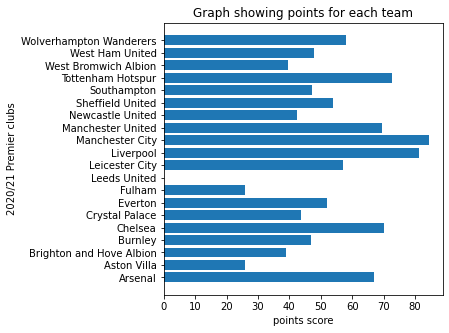

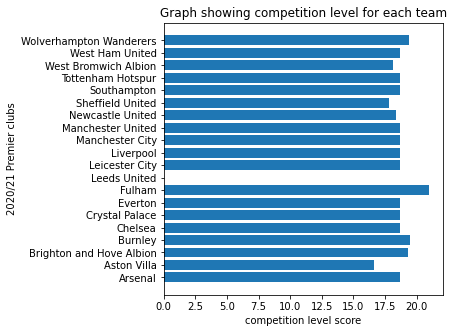

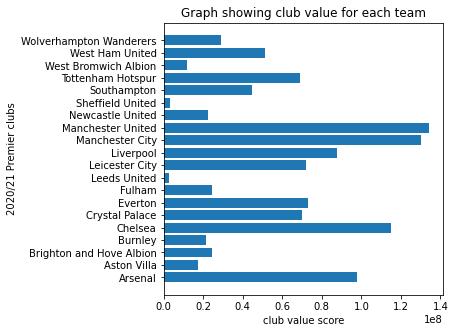

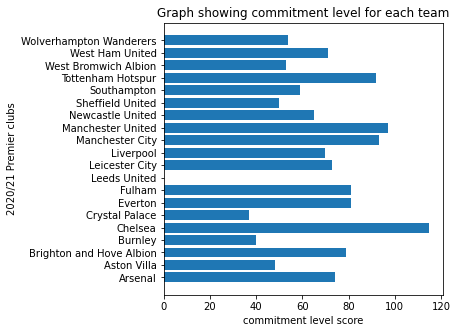

In [37]:
draw_barh_v1(list(all_data.prem_name), list(all_data.contribution_average), "contribution average")
draw_barh_v1(list(all_data.prem_name), list(all_data.squad_depth), "squad depth")
draw_barh_v1(list(all_data.prem_name), list(all_data.points), "points")
draw_barh_v1(list(all_data.prem_name), list(all_data.competition_level), "competition level")
draw_barh_v1(list(all_data.prem_name), list(all_data.club_value), "club value")
draw_barh_v1(list(all_data.prem_name), list(all_data.commitment_level), "commitment level")

The first thing we will do with the following data is to standardise all these values relative to the whole league. The figures above alone tell us who is doing better in each category, but we want to know who is doing the best in all categories. 

In [38]:
all_data.columns

Index(['prem_name', 'contribution_average', 'squad_depth', 'points',
       'competition_level', 'club_value', 'commitment_level'],
      dtype='object')

In [39]:
contribution_average_sum_rel = sum(all_data.contribution_average)
squad_depth_sum_rel = sum(all_data.squad_depth)
points_rel = sum(all_data.points)
competition_level_sum_rel = sum(all_data.competition_level)
#we will use mean_comp_level right at the end
mean_comp_level = competition_level_sum_rel / 20
club_value_sum_rel = sum(all_data.club_value)
commitment_level_sum_rel = sum(all_data.commitment_level)

all_data["contribution_average"] = all_data["contribution_average"] / contribution_average_sum_rel 
all_data["squad_depth"] = all_data["squad_depth"] / squad_depth_sum_rel 
all_data["competition_level"] = all_data["competition_level"] / competition_level_sum_rel 
all_data["points"] = all_data["points"] / points_rel 
all_data["club_value"] = all_data["club_value"] / club_value_sum_rel 
all_data["commitment_level"] = all_data["commitment_level"] / commitment_level_sum_rel 


One team unfortunately hasn't been in the league for over 10 years and that is Leeds United which is why their averages are 0. To deal with this, we will allocate them the average that promoted teams have recieved from the last 5 years that are still competing in the 2020/21 season.  

In [40]:
#promoted between 2015/16 and 2019/20 season inclusive and still in the premier league
promoted_teams_within_5_years = [ 'Sheffield United', 'Aston Villa', 'Wolverhampton Wanderers', 'Fulham', 'Newcastle United', 'Brighton and Hove Albion', 'Burnley' ] 
viable_teams = all_data[ all_data.prem_name.isin(promoted_teams_within_5_years) ]

contribution_average =  sum(list(viable_teams['contribution_average'])) / len(promoted_teams_within_5_years)
squad_depth = sum(list(viable_teams['squad_depth'])) / len(promoted_teams_within_5_years)
points = sum(list(viable_teams['points'])) / len(promoted_teams_within_5_years)
competition_level = sum(list(viable_teams['competition_level'])) / len(promoted_teams_within_5_years)
commitment_level = sum(list(viable_teams['commitment_level'])) / len(promoted_teams_within_5_years)

all_data['contribution_average'][all_data.prem_name=='Leeds United'] = contribution_average
all_data['squad_depth'][all_data.prem_name=='Leeds United'] = squad_depth
all_data['points'][all_data.prem_name=='Leeds United'] = points
all_data['competition_level'][all_data.prem_name=='Leeds United'] = competition_level
all_data['commitment_level'][all_data.prem_name=='Leeds United'] = commitment_level

In [41]:
all_data[all_data.prem_name=='Leeds United']

,prem_name,contribution_average,squad_depth,points,competition_level,club_value,commitment_level
8,Leeds United,0.045015,0.051439,0.040736,0.05305,0.002408,0.044723


Now that we have dealt with Leeds, we will proceed to finding the average of all these variables to give each team a score (we will call it 'average'). We will then use this score to determine the league position of each team.  

In [42]:
def avergae_out_row (value):
    return sum(list(value[1][1:]))/6 

In [43]:
contribution_sum = sum(all_data["contribution_average"])
squad_depth_sum = sum(all_data["squad_depth"])
competition_level_sum = sum(all_data["competition_level"])
points_sum = sum(all_data["points"])
club_value_sum = sum(all_data["club_value"])
commitment_level_sum = sum(all_data["commitment_level"])

all_data["contribution_average"] = all_data["contribution_average"] / contribution_sum 
all_data["squad_depth"] = all_data["squad_depth"] / squad_depth_sum 
all_data["competition_level"] = all_data["competition_level"] / competition_level_sum 
all_data["points"] = all_data["points"] / points_sum 
all_data["club_value"] = all_data["club_value"] / club_value_sum 
all_data["commitment_level"] = all_data["commitment_level"] / commitment_level_sum 

all_data = all_data.assign(average = [ avergae_out_row(x) for x in all_data.iterrows() ])

After generating an average, we now have a data frame that includes averages for each team. 

In [44]:
all_data[['prem_name', 'average']].head()

,prem_name,average
0,Arsenal,0.061837
1,Aston Villa,0.034253
2,Brighton and Hove Albion,0.042492
3,Burnley,0.038854
4,Chelsea,0.069081


The next step will be to take care of key players for most teams. These are the defenders who change the course of the season due to a last minute block to rescue their side from relegation or the Sergio Aguerooooo's of the game who win the league at the last minute of the last day.     

In [45]:
#the following are the categories we will put each 'outstanding' player in
outstanding.position.unique()

array(['Defender', 'Forward', 'Midfielder', 'Goalkeeper'], dtype=object)

In [46]:
outstanding.head()

,season_name,club_name,player_name,position,player_image,Appearances,Clean_sheets,Goals,Assists
0,2019/20,Arsenal,Pablo Mar�,Defender,https://resources.premierleague.com/premierlea...,2,1,0,0
1,2019/20,Arsenal,Pablo Mar�,Defender,https://resources.premierleague.com/premierlea...,2,1,0,0
2,2019/20,Arsenal,Pierre-Emerick Aubameyang,Forward,https://resources.premierleague.com/premierlea...,36,0,22,3
3,2018/19,Arsenal,Alexandre Lacazette,Forward,https://resources.premierleague.com/premierlea...,35,0,13,8
4,2018/19,Arsenal,Pierre-Emerick Aubameyang,Forward,https://resources.premierleague.com/premierlea...,36,0,22,5


We will first take care of players who have moved teams or no longer play the beautiful game. These key players have clearly had an impact on previous clubs, so chances are they will repeat the process. Before we do that, lets take a look at who these players are. 

In [47]:
out_defenders = outstanding.loc[(outstanding.position=='Defender')]  
out_forwards = outstanding.loc[(outstanding.position=='Forward')]  
out_midfield = outstanding.loc[(outstanding.position=='Midfielder')]  
out_goalkeeper = outstanding.loc[(outstanding.position=='Goalkeeper')]  

<h1>Visuals of key players players</h1>

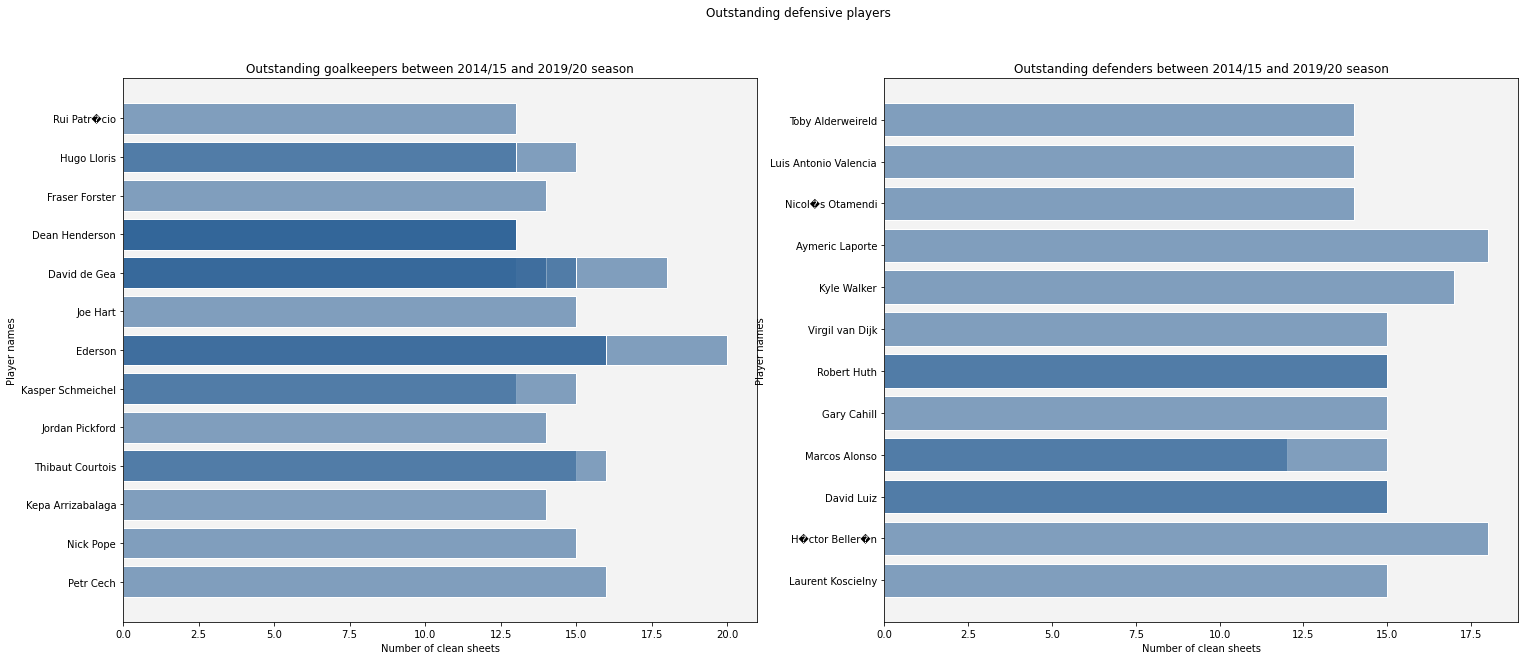

In [48]:
plt.rcParams["figure.figsize"] = (25,10)
plt.rcParams["figure.frameon"] = False

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Outstanding defensive players')

def draw_graph_for (table, attr, ax, xt, xlb):
    names = list(table.player_name)
    results = list(table[attr])
    ax.set_title(xt)
    ax.set_xlabel(xlb)
    ax.set_facecolor('#f3f3f3')
    ax.set_ylabel("Player names")
    # ax.set_fontweight("bold")
    ax.barh(names, results, edgecolor="#fff", color=(0.2, 0.4, 0.6, 0.6), align='center')

# fig(figsize=(10, 2))

draw_graph_for(out_goalkeeper[out_goalkeeper.Appearances>=30], 'Clean_sheets', ax1, "Outstanding goalkeepers between 2014/15 and 2019/20 season", "Number of clean sheets")
draw_graph_for(out_defenders[out_defenders.Appearances>=30], 'Clean_sheets', ax2, "Outstanding defenders between 2014/15 and 2019/20 season", "Number of clean sheets")



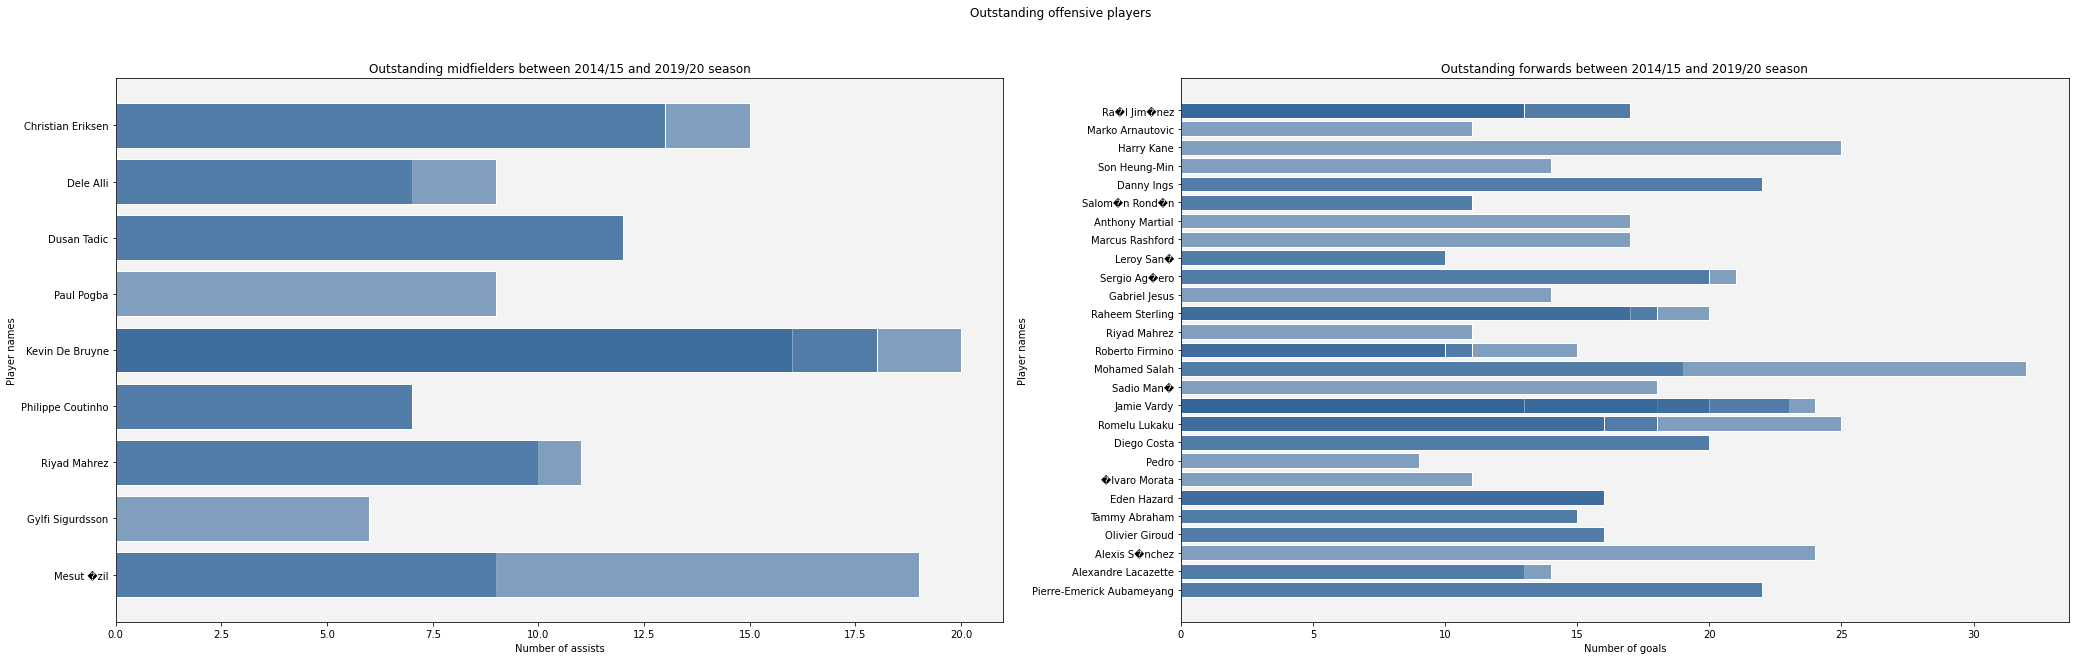

In [49]:
plt.rcParams["figure.figsize"] = (35,10)
fig, (ax3, ax4) = plt.subplots(1, 2)
fig.suptitle('Outstanding offensive players')
draw_graph_for(out_midfield[out_midfield.Appearances>30], 'Assists ', ax3, "Outstanding midfielders between 2014/15 and 2019/20 season", "Number of assists")
draw_graph_for(out_forwards[out_forwards.Appearances>30], 'Goals', ax4, "Outstanding forwards between 2014/15 and 2019/20 season", "Number of goals")

Now lets get back to business... Lets remove the players who are no longer premier league players or have transition clubs.

In [50]:
defenders_remove = [ 'Laurent Koscielny', 'Robert Huth', 'Luis Antonio Valencia' ]
defenders_transition = [ { 'new_team':"Crystal Palace", 'player_name':"Gary Cahill" } ]

forwards_remove = [ 'Eden Hazard', '�lvaro Morata', 'Pedro', 'Diego Costa', 'Romelu Lukaku', 'Leroy San�', 'Salom�n Rond�n', 'Graziano Pell�', 'Marko Arnautovic' ]
forwards_transition = [ 
    { 'new_team':"Manchester United", 'player_name':"Alexis S�nchez" }, 
    { 'new_team':"Chelsea", 'player_name':"Olivier Giroud" }
]

midfielders_remove = [ 'Philippe Coutinho', 'Dusan Tadic', 'Christian Eriksen', 'Dimitri Payet', 'Aaron Ramsey', 'Santi Cazorla', 'Josh Harrop', 'Ryan Babel', 'Henrikh Mkhitaryan' ]
midfielders_transition = [ { 'new_team':"Manchester City", 'player_name':"Riyad Mahrez" } ]

goalkeepers_remove = [ 'Petr Cech', 'Thibaut Courtois' ]
goalkeepers_transition = [ { 'new_team':"Tottenham Hotspur", 'player_name':"Joe Hart" }, 
    { 'new_team':"Manchester United", 'player_name':"Dean Henderson" }
]

player_to_remove = defenders_remove + forwards_remove + midfielders_remove + goalkeepers_remove
player_to_transition = defenders_transition + forwards_transition + midfielders_transition + goalkeepers_transition

outstanding = outstanding[ -outstanding['player_name'].isin(player_to_remove) ]
for a in player_to_transition:
    row = outstanding[outstanding.player_name==a['player_name']]
    row.club_name = a['new_team']
    outstanding[outstanding.player_name==a['player_name']] = row

#we won't use the play images so we'll drop them as well
outstanding.drop(labels='player_image', inplace=True, axis=1)

The next step will be to identfy which teams own these players. We will also remove duplicates since some players have proved their worth on multiple ocasions. 

In [51]:
teams = outstanding.club_name.unique()
outstanding.drop_duplicates(subset='player_name', inplace=True)

In [52]:
club_out_midfield =out_midfield.groupby('club_name').apply(lambda df:df.drop_duplicates(subset='player_name')['club_name'].count())
club_out_defenders =out_defenders.groupby('club_name').apply(lambda df:df.drop_duplicates(subset='player_name')['club_name'].count())
club_out_forwards =out_forwards.groupby('club_name').apply(lambda df:df.drop_duplicates(subset='player_name')['club_name'].count())
club_out_goalkeepers =out_goalkeeper.groupby('club_name').apply(lambda df:df.drop_duplicates(subset='player_name')['club_name'].count())

In [53]:
popuratity = [22.2, 17.6, 8.8, 8, 7.7, 6.7]
explode = (0.08, 0.08, 0.08, 0.08, 0.08, 0.08) 
colors = ["#87CEEB", "#0D3F9E", "#ff0000","#25859A", "#00ff00" , "#fff"]

#function found in the following link
#https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(p=pct,v=val)
    return my_autopct


<h1>Visuals of teams with key players</h1>

In [54]:
def generate_pie (data, type):
    data.sort_values(ascending=False, inplace=True)
    explode = [ 0.08 for x in range(len(data)) ] 
    colors = ["#87CEEB", "#0D3F9E", "#ff0000","#25859A", "#0D3F9E", "#ff0000","#25859A"]

    data.plot.pie(subplots=True, explode=explode, startangle=140, autopct=make_autopct(data), colors=colors, figsize=(6, 6), ylabel="", wedgeprops={"edgecolor":"k", 'linewidth': 1, 'linestyle': 'solid', 'antialiased': True})
    plt.title("Number of key "+type+" teams have", bbox={'facecolor':'#f3f3f3', 'pad':5})
    plt.show()

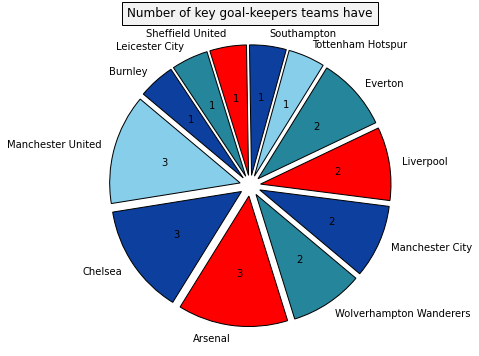

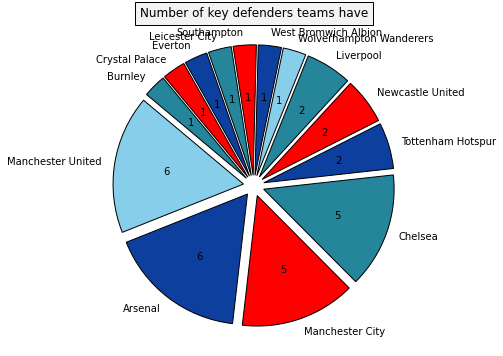

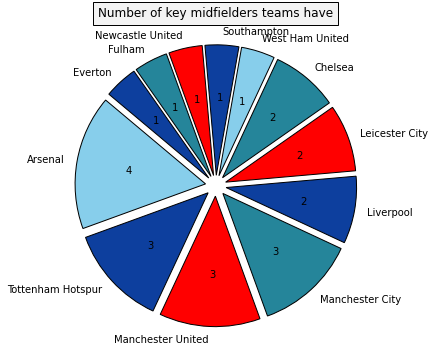

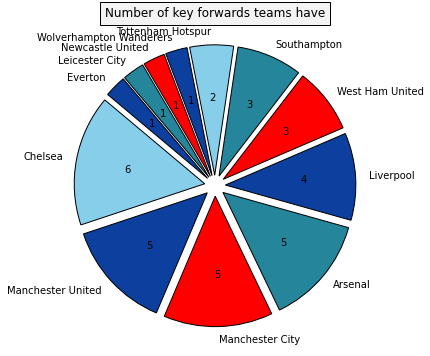

In [55]:
generate_pie(club_out_goalkeepers, "goal-keepers")
generate_pie(club_out_defenders, "defenders")
generate_pie(club_out_midfield, "midfielders")
generate_pie(club_out_forwards, "forwards")

We will now combine the all the positions and place them into their repsective clubs.

In [56]:
outstanding_numbers = pd.concat([club_out_goalkeepers, club_out_forwards, club_out_midfield, club_out_defenders], axis=1)
outstanding_numbers = outstanding_numbers.fillna(0)
team_outstanding_sums = outstanding_numbers.sum(axis=1)
total_number_of_payers = team_outstanding_sums.sum(axis=0)
outstanding_numbers.head()

,0,1,2,3
Manchester United,3.0,5.0,3.0,6.0
Chelsea,3.0,6.0,2.0,5.0
Arsenal,3.0,5.0,4.0,6.0
Wolverhampton Wanderers,2.0,1.0,0.0,1.0
Manchester City,2.0,5.0,3.0,5.0


The "superstar averages" will give us a fair indication of the impact a player can have on a team. So for each team we will compute the following: ("Number of superstars" / "Total number of superstars in the league"). We will then combine the superstar averages for each team with the existing averages we have in our league table to get a combined mean. The re-order will give us our predictions for next years premier league table.  

In [57]:

for team_details in team_outstanding_sums.iteritems():
    team_name = team_details[0]
    superstar_averages = team_details[1]  / total_number_of_payers
    team_current_average = list(all_data.loc[all_data.prem_name==team_name].average)[0]
    #multiply superstar average by 1/11 to represent just an individual instead of the whole team 
    combined_mean = ( float(team_current_average)*4 + superstar_averages*(1/11) ) / ( 4 + (1/11) ) 
        #exceptional circumstance 
    if combined_mean < team_current_average:
        combined_mean = team_current_average

    all_data['average'][all_data.prem_name==team_name] = float(combined_mean) 

In [58]:
all_data.sort_values(by='average', ascending=False, inplace=True)
all_data[['prem_name', 'average']]

,prem_name,average
11,Manchester City,0.074657
12,Manchester United,0.072300
4,Chelsea,0.070559
0,Arsenal,0.063853
10,Liverpool,0.062177
16,Tottenham Hotspur,0.059282
6,Everton,0.053845
9,Leicester City,0.053056
18,West Ham United,0.048692
15,Southampton,0.045984


<h1>
Limitations
</h1>
<ol>
<li>
This investigation does not take into account players who have arrived in January like Bruno Fernandes for Manchester United who have since been able to produce outstanding numbers despite a small number of appearances. It also doesn't take into account the potential of young players who have become regulars at their squads like Arsenal's Bukayo Saka.
</li> 
<br/>
<li>
At the time of writing, the summer transfer window has had a delayed start due to COVID-19 and so we don't know how well equipped teams will be for the incomming season. This means that teams may be more/less equipped than they actually are.      
</li>
<br/> 
<li>
No variable describes how effective transfer decisions have been. This is because although clubs can spend big, there are times when the cash isn't representative of a players quality; especially in football's inflated market.  
</li>    
</ol>

<h1>
Critics 
</h1>

<h2>EUROPEAN SPACES [Top 6 clubs]</h2>

<ol>
    <li>Liverpool finishing outside of the top 2 let alone the top 4 is extremely unlikely. For context, they are current Premier League champions and have gone most of the 2019/20 and 2018/19 season unbeaten including two European titles.</li>
    <br/>    
    <li>Leicester City and Wolverhampton Wanderers have become Top 6 regulars and some would argue they have passed the status of clubs like Arsenal and Tottenham Hotspur.</li>
    <br/>
    <li>Arsenal's positioning at 4th would scratch a couple of heads. Massive investments recommended in their defensive line to match this position.</li>
</ol>  


<h2>FIGHT AGAINST RELEGATION [Last 3 clubs]</h2>
<p>
Aston Villa was a team struggling to stay in the premier league and had to wait until the final day for confirmation that they would stay. Leeds and West Brom have recently been promoted. This would be Leeds United's first introduction to the Premier League since the 2003/4 season. The fight for relegation is always un-predictable, so we'll just go with what the data says.   
</p>

In [59]:
#points away - average competition level * relative distance united are from the top  
points_away = mean_comp_level * (all_data.loc[0]['average'] - all_data.loc[1]['average'])
points_away

0.5256739194686849

<h1>
Conclusion 
</h1>

<p>
The main point of this investigation, aside from predicting the premier league table, was to quantify how far away Manchester United are from winning the league. According to the data above, they are in theory: 0.5 points away from winning the league which isn't bad for a team so inconsitent. If you consider the following:
<ol>
    <li>Introduction of Dean Henderson to compete with De Gea for the goalkeeping poistion.</li>
    <li>Smart investment strategies from Ole Gunnar Solskjaer (The manager)</li>
    <li>Investment in the youth, most notably Mason Greenwood</li>
</ol>  
Then we can assume that United are improving and may be one or two seasons away from winning the league.
</p>

<h1>
Thank you! 
</h1>
<p>
Thank you for reading up to this point. I hope you found it informative. Unfortunately it looks like Manchester City will win the league next year but football can be unpredictable at times and anything can happen. Who knows, United may actually win the league after all.
</p>